<center><h1>Monte Carlo Simulations</h1></center>

## Game of Craps:
In a game of craps, we roll two dice and find their sum.
- If the sum is 7 or 11 (called natural), we win.
- If the sum is 2, 3, or 12 (called craps), we lose.
- Otherwise, we roll the dice until we get the initial sum (win) or a sum of 7 (lose).

### Mathematical proof:
The probability of winning can be expressed as:

$P\left(win\right)=P\left(initial\ sum\ is\ 7\ or\ 11\right)+P\left(new\ sum\ equals\ the\ initial\ sum\right)$

$P\left(initial\ sum\ \in\left\{7,11\right\}\right)=\frac{6}{36}+\frac{2}{36}=\frac{2}{9}$

$P\left(new\ sum=initial\ sum\right)=2\cdot\left(\frac{3}{36}\cdot\frac{3}{9}\right)+2\cdot\left(\frac{4}{36}\cdot\frac{4}{10}\right)+2\cdot\left(\frac{5}{36}\cdot\frac{5}{11}\right)$

$P\left(new\ sum=initial\ sum\right)=\frac{1}{18}+\frac{4}{45}+\frac{25}{198}$

$P\left(win\right)=\frac{2}{9}+\frac{1}{18}+\frac{4}{45}+\frac{25}{198}$

$P\left(win\right)\approx0.492929$

In [2]:
import random as rn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

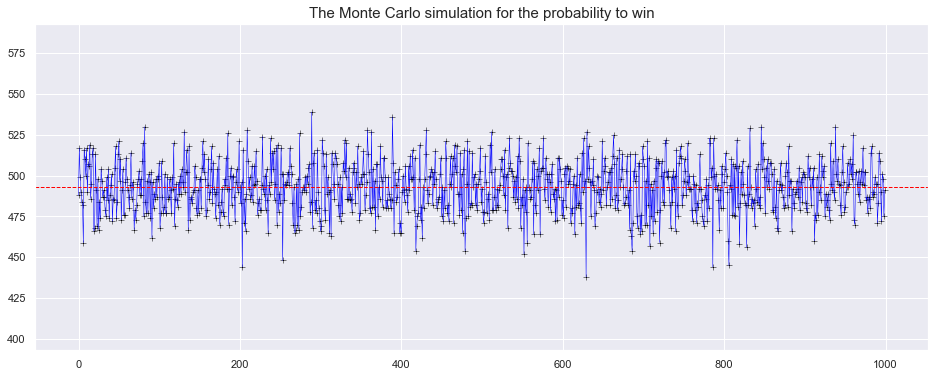

In [26]:
# FUNCTION FOR A SINGLE PLAY
def play():
    die1 = rn.randint(1,6)
    die2 = rn.randint(1,6)
    summ = die1 + die2
    if summ in [7, 11]:
        return 1
    elif summ in [2, 3, 12]:
        return 0
    else:
        while True:
            die1 = rn.randint(1, 6)
            die2 = rn.randint(1, 6)
            if die1+die2 == summ:
                return 1
            elif die1+die2 == 7:
                return 0

# PLOTTING THE RESULTS FOR MULTIPLE GAMES
N, l_count = 10**3, []
Theo = 0.4929292929
for i in range(N):
    count = 0
    for _ in range(N):
        count+=play()
    l_count.append(count)

sns.set(style="darkgrid")    
plt.figure(figsize=(16, 6))
plt.plot(l_count, linewidth=.5, color='blue')
plt.scatter(list(range(N)), l_count, s=30, 
            marker='+', color='black', linewidth=.5)
plt.axhline(Theo * N, color='red',
            linestyle='--', linewidth=1)
plt.ylim(Theo*N-.1*N, Theo*N+.1*N)
plt.title('The Monte Carlo simulation for the probability to win', 
          fontsize=15)
plt.show()

## Coin toss patterns
For this simulation, the idea is to record the longest streak of each side within 10,000 tosses.

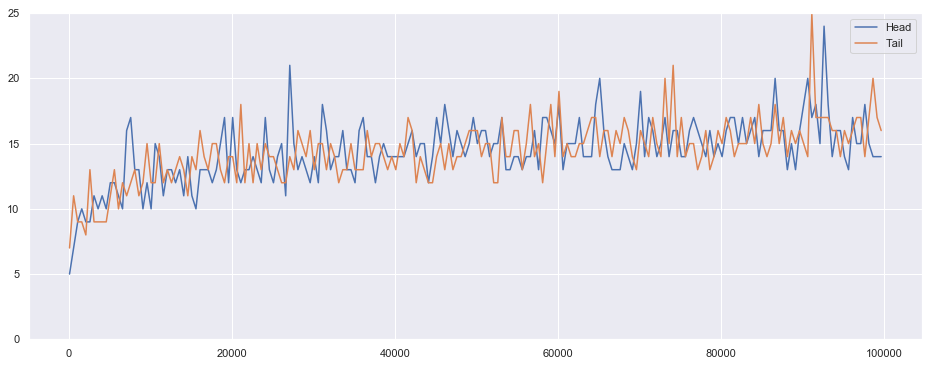

In [24]:
# FUNCTION OF THE COUNTER
def streak_counter(n):
    h_count, t_count = 0, 0
    record, h_streak, t_streak = [], [0], [0]
    
    for _ in range(n):
        toss = rn.choice([1, 0])
        if toss == 1:
            h_count += 1
            t_count = 0
            if h_count > max(h_streak):
                h_streak.append(h_count)
        else:
            h_count = 0
            t_count += 1
            if t_count > max(t_streak):
                t_streak.append(t_count)       
    return h_streak[-1], t_streak[-1]

# VISUALIZING THE RATES
limit, step = 10**5, 500
plt.figure(figsize=(16, 6))
plt.plot([i for i in range(100, limit, step)],
         [streak_counter(i)[0] 
          for i in range(100, limit, step)],
         label='Head')
plt.plot([i for i in range(100, limit, step)],
         [streak_counter(i)[1] 
          for i in range(100, limit, step)],
         label='Tail')
plt.ylim(0, 25)
plt.legend()
plt.show()